In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

from keras.datasets import mnist


<b>  Part - (1) : Train a classification network from scratch </b> 
1. Load MNIST data and create train, test splits
2. Design a simple classification network


> Network should consists of three Dense Layers with 512 nodes. The same architecture is used throughout the assignment to understand the effect of hyper parameters.

> Use stochastic gradient descent optimization algorithm to update the parameters. You can use the learning rate suitable for the MNIST digit classification problem.

> Use ReLU activation function in the first two layers. Softmax activation function should be used at the last layer to get the posterior probability of the classes.






3. Train the network using MNIST training data and evaluate the performance on MNIST test data



In [ ]:
## Defining Important functions:

def relu(x, deriv = False):
  if(deriv == True):
    x_d = np.zeros((x.shape[0],x.shape[1]))
    x_d[x>0] = 1
    return x_d
  return np.maximum(0,x)

def softmax(x):
  x -= np.max(x)
  return (np.exp(x).T / np.sum(np.exp(x),axis=1)).T

def tanh(x, deriv = False):
  if(deriv == True):
    return 1-np.tanh(x)**2
  return np.tanh(x)

def leakyrelu(x, deriv = False):
  if(deriv == True):
    x_d = np.ones_like(x)
    x_d[x<0] = 0.01
    return x_d
  return np.maximum(0.1*x,x)

def sigmoid(x ,deriv = False):
  ee = 1/1+np.exp(-x)
  if(deriv == True):
    return ee * (1-ee)
  return ee

def one_hot(x):
  x_encoded = np.zeros((x.shape[0],10))
  x_encoded[np.arange(x.shape[0]),x.reshape(x.shape[0])] = 1
  return x_encoded

def accuracy(t_pred, y):
    ac = (np.sum(np.argmax(t_pred,axis=1) == np.argmax(y,axis=1))/y.shape[0])
    return ac*100

def activation_func(x,act_type,deriv=False):
  if(act_type == 'relu'):
    return relu(x,deriv)
  elif(act_type == 'sigmoid'):
    return sigmoid(x,deriv)
  elif(act_type == 'tanh'):
    return tanh(x,deriv)
  elif(act_type == 'leakyrelu'):
    return leakyrelu(x,deriv)

X_train shape (60000, 784)
X_test shape (10000, 784)
y_train shape (60000,)
y_test shape (10000,)
Epoch = 1//10 :: Batch number 1 :: Accuracy ==> 10.5
Epoch = 1//10 :: Batch number 2 :: Accuracy ==> 14.000000000000002
Epoch = 1//10 :: Batch number 3 :: Accuracy ==> 10.5
Epoch = 1//10 :: Batch number 4 :: Accuracy ==> 14.499999999999998
Epoch = 1//10 :: Batch number 5 :: Accuracy ==> 16.0
Epoch = 1//10 :: Batch number 6 :: Accuracy ==> 17.0
Epoch = 1//10 :: Batch number 7 :: Accuracy ==> 17.0
Epoch = 1//10 :: Batch number 8 :: Accuracy ==> 12.0
Epoch = 1//10 :: Batch number 9 :: Accuracy ==> 13.0
Epoch = 1//10 :: Batch number 10 :: Accuracy ==> 19.0
Epoch = 1//10 :: Batch number 11 :: Accuracy ==> 19.0
Epoch = 1//10 :: Batch number 12 :: Accuracy ==> 20.5
Epoch = 1//10 :: Batch number 13 :: Accuracy ==> 19.5
Epoch = 1//10 :: Batch number 14 :: Accuracy ==> 25.5
Epoch = 1//10 :: Batch number 15 :: Accuracy ==> 23.5
Epoch = 1//10 :: Batch number 16 :: Accuracy ==> 30.0
Epoch = 1//10 :: Ba

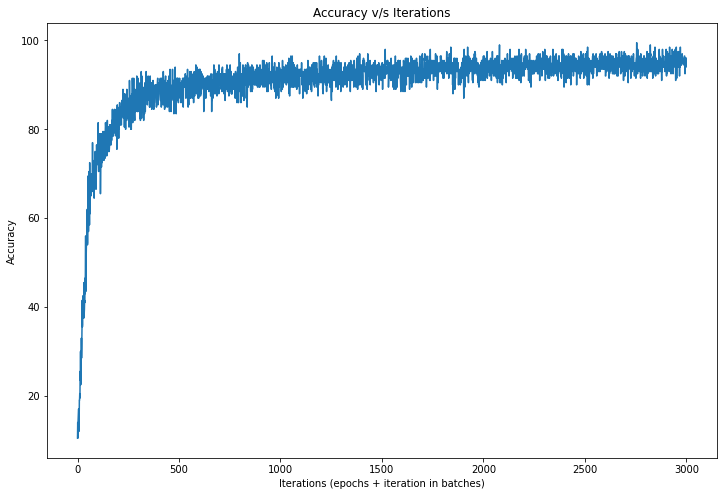

In [ ]:
##################################################
#Load MNIST data.
##################################################

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[2]))

#Normalizing 
x_train = (x_train/(255 * 0.99)) + 0.01
x_test = (x_test/(255 * 0.99)) + 0.01



print("X_train shape", x_train.shape)
print("X_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

##################################################
#Build the architecture
##################################################

## Defining the weights and bias
N_in = x_train.shape[1]
L1 = 512
L2 = 512
L3 = 512
N_out = 10

W1 = np.random.normal(0,N_in**(-0.5),[N_in,L1])
W2 = np.random.normal(0,L1**(-0.5),[L1,L2])
W3 = np.random.normal(0,L2**(-0.5),[L2,L3])
W4 = np.random.normal(0,L3**(-0.5),[L3,N_out])

B1 = np.random.normal(0,N_in**(-0.5),[1,L1])
B2 = np.random.normal(0,L1**(-0.5),[1,L2])
B3 = np.random.normal(0,L2**(-0.5),[1,L3])
B4 = np.random.normal(0,L3**(-0.5),[1,N_out])

WB = [W1,W2,W3,W4,B1,B2,B3,B4] 

##################################################
#Train the network
##################################################

def train(x_train,y_train,WB,lr,activation,backpropagation = True):

  w1,w2,w3,w4,b1,b2,b3,b4 = WB

  ## Forward Propagation
  a1 = x_train@w1 + b1
  z1 = relu(a1)

  a2 = z1@w2 + b2
  z2 = relu(a2)

  a3 = z2@w3 + b3
  z3 = relu(a3)

  out_pred = softmax(z3@w4 + b4)

  if(backpropagation == False):
    return out_pred

  ## Backward Propagation
  y_train = np.eye(10)[y_train]
  e4_del = (y_train - out_pred)

  e3_err = e4_del@w4.T
  e3_del = e3_err * activation_func(z3, act_type=activation, deriv = True)

  e2_err = e3_del@w3.T
  e2_del = e2_err * activation_func(z2, act_type=activation, deriv = True)

  e1_err = e2_del@w2.T
  e1_del = e1_err * activation_func(z1, act_type=activation, deriv = True)

  lr = -lr/x_train.shape[0]

  ## Updates
  w4 -= lr * (z3.T@e4_del)
  b4 -= lr * (e4_del.sum(axis=0))

  w3 -= lr * (z2.T@e3_del)
  b3 -= lr * (e3_del.sum(axis=0))

  w2 -= lr * (z1.T@e2_del)
  b2 -= lr * (e2_del.sum(axis=0))

  w1 -= lr * (x_train.T@e1_del)
  b1 -= lr * (e1_del.sum(axis=0))

  WB = [w1,w2,w3,w4,b1,b2,b3,b4]
  return WB,out_pred


def SGD(x_train, y_train, epochs, nbatch, WB, lr, activation, prt = True):
    
  rand_idx = np.arange(x_train.shape[0])
  acc_vec = []
  for epch in range(epochs):
    np.random.shuffle(rand_idx)
    iters = x_train.shape[0]//nbatch

    for i in range(iters):
      start = i*nbatch
      end = start+nbatch
            
      if(end > (x_train.shape[0] - 1)):
        end = x_train.shape[0]

      x_bat = x_train[rand_idx[start:end]]
      y_bat = y_train[rand_idx[start:end]]

      WB, t_pred = train(x_bat,y_bat,WB,lr,activation)

      y_bat = one_hot(y_bat) 

      acc = accuracy(y_bat, t_pred)

      acc_vec.append(acc)
      if(prt == True):
        print(f"Epoch = {epch+1}//{epochs} :: Batch number {i+1} :: Accuracy ==> {acc}")
            

      
    print(f"Final Acurracy at the end of epoch {epch+1} ==> {acc}")
            
            

  [w1,w2,w3,w4,b1,b2,b3,b4]  = WB
  WB_final = [w1.copy(),w2.copy(),w3.copy(),w4.copy(),b1.copy(),b2.copy(),b3.copy(),b4.copy()]

  return WB_final, acc, acc_vec

lr = 2e-2
epochs = 10
nbatchs = 200
activation = 'relu'
W_final, ac, acc_vec = SGD(x_train,y_train,epochs,nbatchs,WB,lr,activation)



##################################################
#Test the network and write down the performance
##################################################

y_test_pred = train(x_test,y_test,W_final,lr,activation,backpropagation = False)

test_acc = accuracy(y_test_pred,one_hot(y_test))
print(f"Testing Accuracy : {test_acc}")


plt.figure(figsize=(12,8))
plt.title("Accuracy v/s Iterations")
plt.plot(np.arange(len(acc_vec)),acc_vec)
plt.xlabel('Iterations (epochs + iteration in batches)')
plt.ylabel('Accuracy')

plt.show()







<b> Part - (2) : Understanding activation functions </b>

In this part you will learn to use different activation functions for the classification task and compare their performances.

1. Train MNIST digit classification problem with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part
2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br>
NOTE: You can use the classification network designed by you from scratch (or) you can build the model using pytorch.



In [ ]:
##################################################
#Train the network with different activation functions RELU
##################################################

## Defining the weights and bias
N_in = x_train.shape[1]
L1 = 512
L2 = 512
L3 = 512
N_out = 10

W1 = np.random.normal(0,N_in**(-0.5),[N_in,L1])
W2 = np.random.normal(0,L1**(-0.5),[L1,L2])
W3 = np.random.normal(0,L2**(-0.5),[L2,L3])
W4 = np.random.normal(0,L3**(-0.5),[L3,N_out])

B1 = np.random.normal(0,N_in**(-0.5),[1,L1])
B2 = np.random.normal(0,L1**(-0.5),[1,L2])
B3 = np.random.normal(0,L2**(-0.5),[1,L3])
B4 = np.random.normal(0,L3**(-0.5),[1,N_out])

WB_r = [W1,W2,W3,W4,B1,B2,B3,B4] 

lr = 2e-2
epochs = 5
nbatchs = 200
activation = 'relu'
# If want to print accuracy with iteration then : prt = True"
W_final_r, ac_r, acc_vec_r = SGD(x_train,y_train,epochs,nbatchs,WB_r,lr,activation,prt=False)





##################################################
#Write down the accuracies and report your observations
##################################################

y_test_pred_r = train(x_test,y_test,W_final_r,lr,activation,backpropagation = False)

test_acc_relu = accuracy(y_test_pred_r,one_hot(y_test))
print(f"Testing Accuracy (Relu): {test_acc_relu}")










Final Acurracy at the end of epoch 1 ==> 87.0
Final Acurracy at the end of epoch 2 ==> 88.5
Final Acurracy at the end of epoch 3 ==> 89.5
Final Acurracy at the end of epoch 4 ==> 92.0
Final Acurracy at the end of epoch 5 ==> 92.0
Testing Accuracy (Relu): 93.01


In [ ]:
##################################################
#Train the network with different activation functions  SIGMOID
##################################################

## Defining the weights and bias
N_in = x_train.shape[1]
L1 = 512
L2 = 512
L3 = 512
N_out = 10

W1 = np.random.normal(0,N_in**(-0.5),[N_in,L1])
W2 = np.random.normal(0,L1**(-0.5),[L1,L2])
W3 = np.random.normal(0,L2**(-0.5),[L2,L3])
W4 = np.random.normal(0,L3**(-0.5),[L3,N_out])

B1 = np.random.normal(0,N_in**(-0.5),[1,L1])
B2 = np.random.normal(0,L1**(-0.5),[1,L2])
B3 = np.random.normal(0,L2**(-0.5),[1,L3])
B4 = np.random.normal(0,L3**(-0.5),[1,N_out])

WB_s = [W1,W2,W3,W4,B1,B2,B3,B4] 

lr = 2e-2
epochs = 5
nbatchs = 200
activation = 'sigmoid'
W_final_s, ac_s, acc_vec_s = SGD(x_train,y_train,epochs,nbatchs,WB_s,lr,activation,prt=False)





##################################################
#Write down the accuracies and report your observations
##################################################

y_test_pred_s = train(x_test,y_test,W_final_s,lr,activation,backpropagation = False)

test_acc_sigmoid = accuracy(y_test_pred_s,one_hot(y_test))
print(f"Testing Accuracy (Sigmoid): {test_acc_sigmoid}")










Final Acurracy at the end of epoch 1 ==> 28.000000000000004


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


Final Acurracy at the end of epoch 2 ==> 9.5
Final Acurracy at the end of epoch 3 ==> 10.0
Final Acurracy at the end of epoch 4 ==> 7.000000000000001
Final Acurracy at the end of epoch 5 ==> 11.0
Testing Accuracy (Sigmoid): 9.8


In [ ]:
##################################################
#Train the network with different activation functions  TANH
################################################## 

## Defining the weights and bias
N_in = x_train.shape[1]
L1 = 512
L2 = 512
L3 = 512
N_out = 10

W1 = np.random.normal(0,N_in**(-0.5),[N_in,L1])
W2 = np.random.normal(0,L1**(-0.5),[L1,L2])
W3 = np.random.normal(0,L2**(-0.5),[L2,L3])
W4 = np.random.normal(0,L3**(-0.5),[L3,N_out])

B1 = np.random.normal(0,N_in**(-0.5),[1,L1])
B2 = np.random.normal(0,L1**(-0.5),[1,L2])
B3 = np.random.normal(0,L2**(-0.5),[1,L3])
B4 = np.random.normal(0,L3**(-0.5),[1,N_out])

WB_th = [W1,W2,W3,W4,B1,B2,B3,B4] 

lr = 2e-2
epochs = 5
nbatchs = 200
activation = 'tanh'
W_final_th, ac_th, acc_vec_th = SGD(x_train,y_train,epochs,nbatchs,WB_th,lr,activation,prt=False)





##################################################
#Write down the accuracies and report your observations
##################################################

y_test_pred_th = train(x_test,y_test,W_final_th,lr,activation,backpropagation = False)

test_acc_tanh = accuracy(y_test_pred_th,one_hot(y_test))
print(f"Testing Accuracy (tanh): {test_acc_tanh}")










Final Acurracy at the end of epoch 1 ==> 77.5
Final Acurracy at the end of epoch 2 ==> 88.0
Final Acurracy at the end of epoch 3 ==> 90.0
Final Acurracy at the end of epoch 4 ==> 92.0
Final Acurracy at the end of epoch 5 ==> 92.0
Testing Accuracy (tanh): 90.47


In [ ]:
##################################################
#Train the network with different activation functions  LEAKYRELU
##################################################

## Defining the weights and bias
N_in = x_train.shape[1]
L1 = 512
L2 = 512
L3 = 512
N_out = 10

W1 = np.random.normal(0,N_in**(-0.5),[N_in,L1])
W2 = np.random.normal(0,L1**(-0.5),[L1,L2])
W3 = np.random.normal(0,L2**(-0.5),[L2,L3])
W4 = np.random.normal(0,L3**(-0.5),[L3,N_out])

B1 = np.random.normal(0,N_in**(-0.5),[1,L1])
B2 = np.random.normal(0,L1**(-0.5),[1,L2])
B3 = np.random.normal(0,L2**(-0.5),[1,L3])
B4 = np.random.normal(0,L3**(-0.5),[1,N_out])

WB_lr = [W1,W2,W3,W4,B1,B2,B3,B4] 

lr = 2e-2
epochs = 5
nbatchs = 200
activation = 'leakyrelu'
W_final_lr, ac_lr, acc_vec_lr = SGD(x_train,y_train,epochs,nbatchs,WB_lr,lr,activation,prt=False)





##################################################
#Write down the accuracies and report your observations
##################################################

y_test_pred_lr = train(x_test,y_test,W_final_lr,lr,activation,backpropagation = False)

test_acc_leakyrelu = accuracy(y_test_pred_lr,one_hot(y_test))
print(f"Testing Accuracy (Leaky_Relu): {test_acc_leakyrelu}")










Final Acurracy at the end of epoch 1 ==> 87.5
Final Acurracy at the end of epoch 2 ==> 87.5
Final Acurracy at the end of epoch 3 ==> 91.0
Final Acurracy at the end of epoch 4 ==> 92.0
Final Acurracy at the end of epoch 5 ==> 87.0
Testing Accuracy (Leaky_Relu): 92.10000000000001


Test Accuracies for differnet activation functions used in hidden layers : 
For Relu : 93.01
For Sigmoid : 9.8
For tanh : 90.47
For LeakyRelu : 92.10000000000001


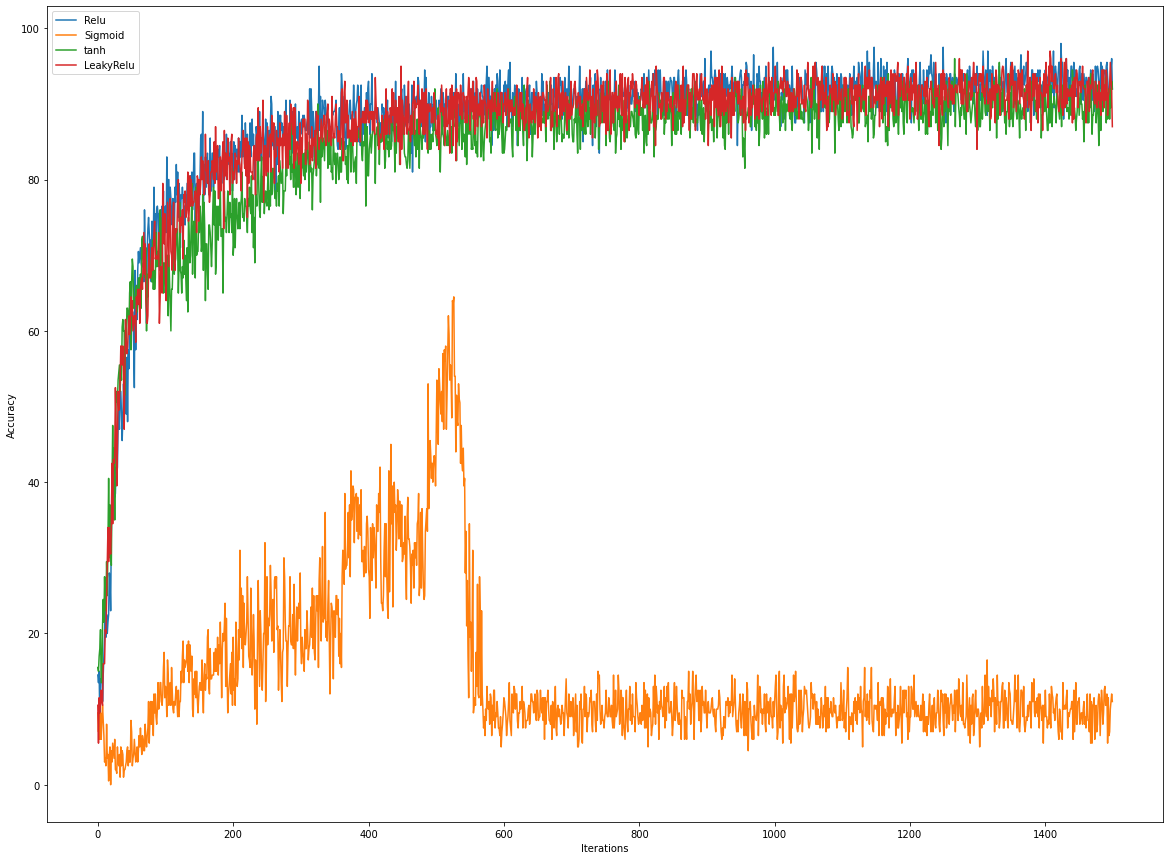

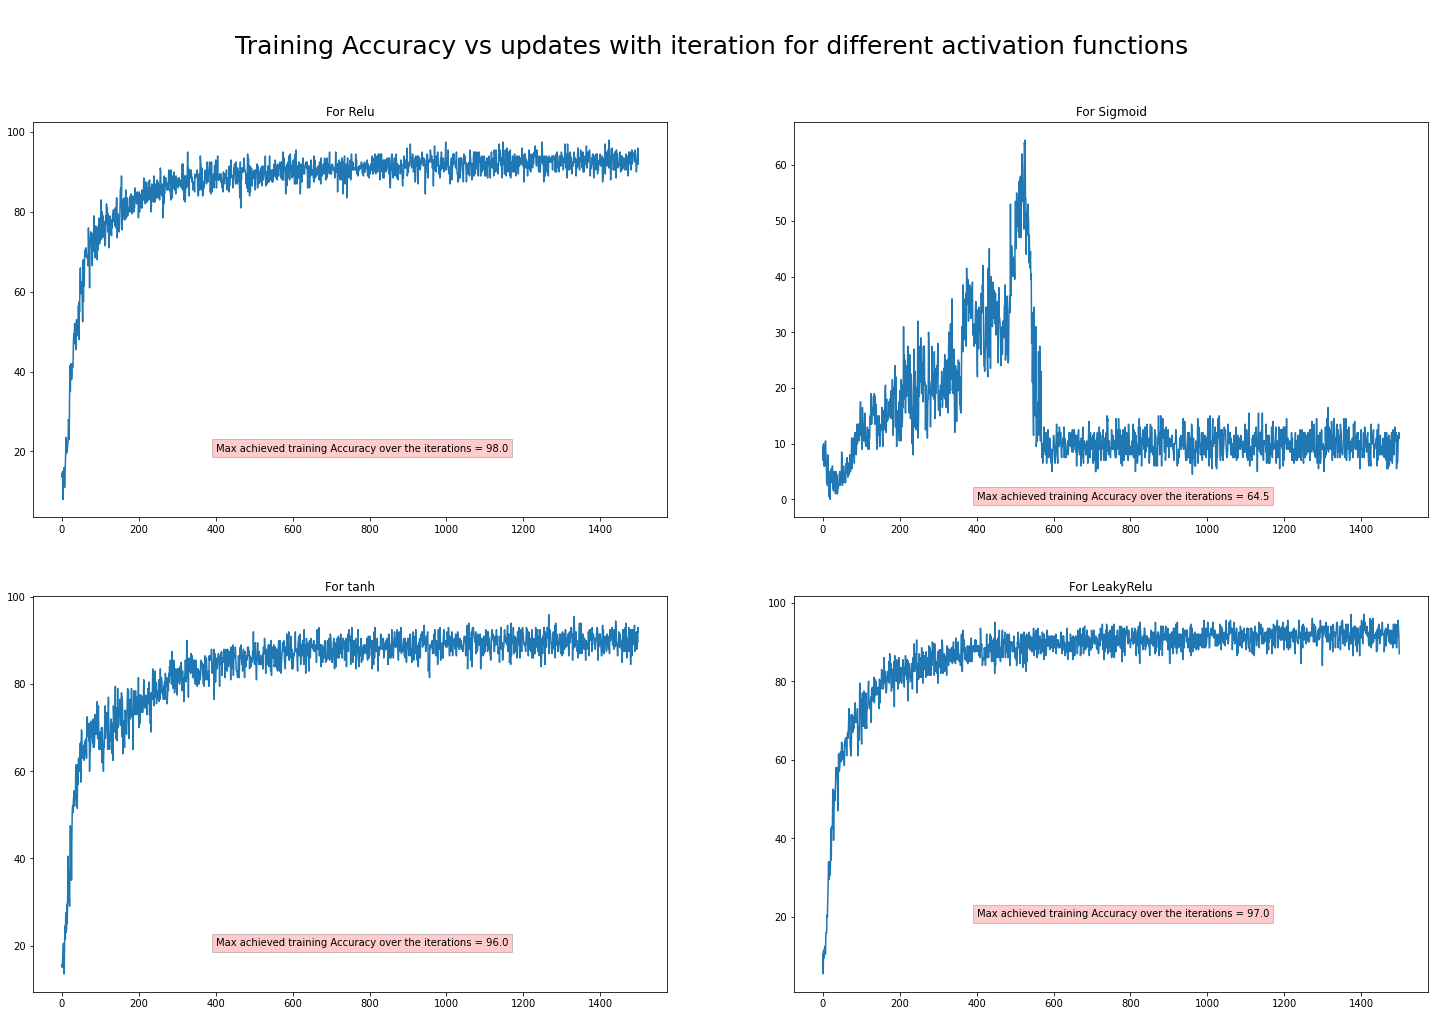

In [ ]:
#########################################################################################################################
##############################################  TEST  ACCURACY  #########################################################

## Comparing the accuracies for different activation functions for same given parameteres(epochs,lr,batch_size):
print("Test Accuracies for differnet activation functions used in hidden layers : ")
print(f"For Relu : {test_acc_relu}")
print(f"For Sigmoid : {test_acc_sigmoid}")
print(f"For tanh : {test_acc_tanh}")
print(f"For LeakyRelu : {test_acc_leakyrelu}")

## Plotting accuracy with each updates:
itrs = len(acc_vec_r)
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(np.arange(itrs),acc_vec_r, label = "Relu")
ax.plot(np.arange(itrs),acc_vec_s, label = "Sigmoid")
ax.plot(np.arange(itrs),acc_vec_th, label = "tanh")
ax.plot(np.arange(itrs),acc_vec_lr, label = "LeakyRelu")
ax.set_ylabel('Accuracy')
ax.set_xlabel('Iterations')
ax.legend()

fig, (f1,f2) = plt.subplots(2, 2, figsize = (25,16))
fig.suptitle("\n Training Accuracy vs updates with iteration for different activation functions", fontsize = 25)
f1[0].set_title("For Relu")
# f1[0].set_xscale('log')
f1[0].text(400, 20, f"Max achieved training Accuracy over the iterations = {max(acc_vec_r)}", bbox=dict(facecolor='red', alpha=0.2))
f1[0].plot(np.arange(itrs),acc_vec_r, label = 'Relu')

f1[1].set_title("For Sigmoid")
# f1[1].set_xscale('log')
f1[1].text(400, 0, f"Max achieved training Accuracy over the iterations = {max(acc_vec_s)}", bbox=dict(facecolor='red', alpha=0.2))
f1[1].plot(np.arange(itrs),acc_vec_s, label = 'Sigmoid')

f2[0].set_title("For tanh")
# f2[0].set_xscale('log')
f2[0].text(400, 20, f"Max achieved training Accuracy over the iterations = {max(acc_vec_th)}", bbox=dict(facecolor='red', alpha=0.2))
f2[0].plot(np.arange(itrs),acc_vec_th, label = 'tanh')

f2[1].set_title("For LeakyRelu")
# f2[1].set_xscale('log')
f2[1].text(400, 20, f"Max achieved training Accuracy over the iterations = {max(acc_vec_lr)}", bbox=dict(facecolor='red', alpha=0.2))
f2[1].plot(np.arange(itrs),acc_vec_lr, label = 'LeakyRelu')

plt.show()


#############################################################################################################################
################################ OBSERVATIONS ###############################################################################

# 1. We see that when Sigmoid activation function is used the accuracy goes up at start but soon goes down after few iterations.
# 2. For Relu, tanh and LeakyRelu activation function, after certain minimal number of iterations the accuracy converges and 
#     then rate of it's increase also decreases. (Fluctuates around 90%)
# 3. LeakyRelu function's accuracy grows faster during initial iterations if compared to other activation functions.



<b> Part - (3) : Understanding optimization algorithms </b>

In this part you will learn to use different optimiztion algorithm apart from SGD.

1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm.
3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms.
4. Report your observations.

In [ ]:

def Feed_forward_2(Weights,x,activation):
    
    w1,w2,w3,w4,b1,b2,b3,b4  = Weights
    
    #1-Hidden Layer
    first = activation(x@w1+b1)[0]
    #2-Hidden Layer
    second = activation(first@w2+b2)[0]
    #3-Hidden Layer
    third = activation(second@w3+b3)[0]
    
    #Output Layer
    return [first, second, third, softmax(third@w4+b4)]

def BP_2(weights, x, t,outputs ,eta,der_activation):
    
    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    
    first, second, third, y =  outputs
    t = np.eye(10)[t] # 1-hot coding format
    
    w4_delta = (t-y)
   
    w3_error = w4_delta@w4.T
    w3_delta = w3_error * der_activation(third)[1]

    w2_error = w3_delta@w3.T
    w2_delta = w2_error *  der_activation(second)[1]

    w1_error = w2_delta@w2.T
    w1_delta = w1_error * der_activation(first)[1]

    eta = -eta/x.shape[0]

    w4 -= eta * (third.T@w4_delta)
    b4 -= eta * w4_delta.sum(axis=0)

    w3 -= eta * (second.T@w3_delta)
    b3 -= eta * w3_delta.sum(axis=0)

    w2 -= eta * (first.T@w2_delta)
    b2 -= eta * w2_delta.sum(axis=0)

    w1 -= eta * (x.T@w1_delta)
    b1 -= eta * w1_delta.sum(axis=0)
    
    weights = [w1,w2,w3,w4,b1,b2,b3,b4]
    
    return weights



In [ ]:
##################################################
#Train the network using Adam optimizer
##################################################

def Grad(weights, x, t,outputs ,eta, gamma, nabla):
    
    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    
    vw1 = np.zeros_like(w1)
    vw2 = np.zeros_like(w2)
    vw3 = np.zeros_like(w3)
    vw4 = np.zeros_like(w4)
    vb1 = np.zeros_like(b1)
    vb2 = np.zeros_like(b2)
    vb3 = np.zeros_like(b3)
    vb4 = np.zeros_like(b4)
    
    first, second, third, y =  outputs
    t = np.eye(10)[t] # 1-hot coding format
    
    w4_delta = (t-y)
   
    w3_error = w4_delta@w4.T
    w3_delta = w3_error * relu_aks(third)[1]

    w2_error = w3_delta@w3.T
    w2_delta = w2_error *  relu_aks(second)[1]

    w1_error = w2_delta@w2.T
    w1_delta = w1_error * relu_aks(first)[1]

    
    eta = -eta/x.shape[0]

    vw4 = gamma*vw4 + eta * (third.T@w4_delta + nabla*w4)
    vb4 = gamma*vb4 + eta * w4_delta.sum(axis=0)
 
    vw3 = gamma*vw3 + eta * (second.T@w3_delta + nabla*w3)
    vb3 = gamma*vb3 + eta * w3_delta.sum(axis=0)

    vw2 = gamma*vw2 + eta * (first.T@w2_delta + nabla*w2)
    vb2 = gamma*vb2 + eta * w2_delta.sum(axis=0)

    vw1 = gamma*vw1 + eta * (x.T@w1_delta + nabla*w1)
    vb1 = gamma*vb1 + eta * w1_delta.sum(axis=0)
    
    g = [vw1,vw2,vw3,vw4,vb1,vb2,vb3,vb4]
    
    return g
def Adam_opt(t,w,b,dw,db,eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
    w1,w2,w3,w4,b1,b2,b3,b4  = WB
    
    m_dw, v_dw = 0, 0
    m_db, v_db = 0, 0
   
    ## momentum beta 1
    # * weights * #
    m_dw = beta1*m_dw + (1-beta1)*dw
    # * biases * #
    m_db = beta1*m_db + (1-beta1)*db

    ## rms beta 2
    # * weights * #
    v_dw = beta2*v_dw + (1-beta2)(dw*2)
    # * biases * #
    v_db = beta2*v_db + (1-beta2)(db*2)

    ## bias correction
    m_dw_corr = m_dw/(1-beta1**t)
    m_db_corr = m_db/(1-beta1**t)
    v_dw_corr = v_dw/(1-beta2**t)
    v_db_corr = v_db/(1-beta2**t)

    ## update weights and biases
    w = w - eta*(m_dw_corr/(np.sqrt(v_dw_corr)+ epsilon))
    b = b - eta*(m_db_corr/(np.sqrt(v_db_corr)+ epsilon))

    return w,b

def ALL_Weights(weights,x_train,y_train,outputs,eta =1e-3, gamma=0, nabla=0.01,beta1=0.9, beta2=0.999, epsilon=1e-8):
  [w1,w2,w3,w4,b1,b2,b3,b4] = weights

  
  # FEED_FORWARD:
  z1 = relu(x_train@w1+b1)
  z2 = relu(z1@w2+b2)
  z3 = relu(z2@w3+b3)
  out_pred = softmax(z3@w4+b4)
            
  output_FF = [z1,z2,z3,out_pred]


  outputs = output_FF
  t = 1
  [vw1,vw2,vw3,vw4,vb1,vb2,vb3,vb4] = Grad(weights,x_train,y_train,outputs ,1e-3, gamma=0, nabla=0.01)
  w1 ,b1 = Adam_opt(t,w1,b1,vw1,vb1,eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8)
  w2 ,b2 = Adam_opt(t,w2,b2,vw2,vb2,eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8)
  w3 ,b3 = Adam_opt(t,w3,b3,vw3,vb3,eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8)
  w4 ,b4 = Adam_opt(t,w4,b4,vw4,vb4,eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8)
  return  [ w1,w2,w3,w4,b1,b2,b3,b4 ]


def Train_Adam(weights, x_train, y_train, epochs = 10, nbatchs=25, eta =1e-3,
                       gamma=0, nabla=0.01,beta1=0.9, beta2=0.999, epsilon=1e-8):
    
    index = np.arange(x_train.shape[0])
    print("Training data: %d" % (x_train.shape[0]))
    
    f_weights = []
    T_loss = 0
    ac = 0
    for j in range(epochs):
        np.random.shuffle(index)
        iterations = round(x_train.shape[0]/nbatchs)
        #print("\nEpochs: %2d \ %2d \n"% (j+1,epochs))
        for i in range(iterations):
            f = i*nbatchs
            l = f+nbatchs
            
            if(l>(x_train.shape[0]-1)):
                l = x_train.shape[0]

        x = x_train[index[f:l]]
        y = y_train[index[f:l]]

        # FEED_FORWARD:
        z1 = relu(x@weights[0]+weights[4])
        z2 = relu(z1@weights[1]+weights[5])
        z3 = relu(z2@weights[2]+weights[6])
        out_pred = softmax(z3@weights[3]+weights[7])
            
        output_FF = [z1,z2,z3,out_pred]
        t = one_hot(y)

        acc = accuracy(out_pred, t)
            
        ac = acc

        weights= ALL_Weights(weights,x,y,output_FF ,eta =1e-3,
                       gamma=0, nabla=0.01,beta1=0.9, beta2=0.999, epsilon=1e-8)

        
    print(f"Acurracy  {ac}")


    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    f_weights = [w1.copy(),w2.copy(),w3.copy(),w4.copy(),  b1.copy(),b2.copy(),b3.copy(),b4.copy() ]
    return f_weights
    
def SGD_Compare(weights, x_train, y_train, epochs,nbatchs, alpha,activation):
    
    index = np.arange(x_train.shape[0])
    print("Training data: %d" % (x_train.shape[0]))
    
    f_weights = []
    T_loss = 0
    ac = 0
    for j in range(epochs):
        np.random.shuffle(index)
        iterations = round(x_train.shape[0]/nbatchs)
        #print("\nEpochs: %2d \ %2d \n"% (j+1,epochs))
        for i in range(iterations):
            f = i*nbatchs
            l = f+nbatchs
            
            if(l>(x_train.shape[0]-1)):
                l = x_train.shape[0]

        x = x_train[index[f:l]]
        y = y_train[index[f:l]]

        weights, y_pred = train(x,y,weights,alpha,activation,backpropagation=True)
            
        ypred = y_pred
        t = one_hot(y)

        accuracy_t = accuracy(ypred, t)
            
        ac = accuracy_t

        
    print("Acurracy :- ",ac)

    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    f_weights = [w1.copy(),w2.copy(),w3.copy(),w4.copy(),  b1.copy(),b2.copy(),b3.copy(),b4.copy() ]
    return f_weights

<b> Part - (4) : Understanding regularization methods </b>

In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem.</br>
Using the above built network, inculcate the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.

1. Weight regularization
2. Dropout with a probability of 0.5
3. Early stopping


## Weight Regularization

In [ ]:
def SGD_L2(weights, x, t,outputs ,lr, l2):
    
    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    
    z1, z2, z3, y_pred =  outputs
    t = one_hot(t) 

    e4_delta = (t-y_pred)
   
    e3_error = e4_delta@w4.T
    e3_delta = e3_error * leakyrelu(z3,deriv=True)

    e2_error = e3_delta@w3.T
    e2_delta = e2_error *  leakyrelu(z2,deriv=True)

    e1_error = e2_delta@w2.T
    e1_delta = e1_error * leakyrelu(z3,deriv=True)

    
    lr = -lr/x.shape[0]

    w4 -=  lr * (z3.T@e4_delta + l2*w4)
    b4 -=  lr * e4_delta.sum(axis=0)
 
    w3 -=  lr * (z2.T@e3_delta + l2*w3)
    b3 -=  lr * e3_delta.sum(axis=0)

    w2 -=  lr * (z1.T@e2_delta + l2*w2)
    b2 -=  lr * e2_delta.sum(axis=0)

    w1 -= lr * (x.T@e1_delta + l2*w1)
    b1 -= lr * e1_delta.sum(axis=0)

    weights = [w1,w2,w3,w4,b1,b2,b3,b4]
    
    return weights

def train_l2(weights, x_train, y_train, epochs, nbatchs, alpha ,l2):
    
    index = np.arange(x_train.shape[0])
    print("Training data: %d" % (x_train.shape[0]))
    
    weights_vec = []
    ac = 0
    for j in range(epochs):
        np.random.shuffle(index)
        iterations = round(x_train.shape[0]/nbatchs)
        print(f"Epochs : {j+1} // {epochs} ")
        for i in range(iterations):
            start = i*nbatchs
            end = start+nbatchs
            
            if(end>(x_train.shape[0]-1)):
                end = x_train.shape[0]

            x = x_train[index[start:end]]
            y = y_train[index[start:end]]

            w1,w2,w3,w4,b1,b2,b3,b4  = weights
              
            # FEED_FORWARD:
            z1 = relu(x@w1+b1)
            z2 = relu(z1@w2+b2)
            z3 = relu(z2@w3+b3)
            out_pred = softmax(z3@w4+b4)
                      
            output_FF = [z1,z2,z3,out_pred]


            outputs = output_FF
                
            ypred = outputs[-1]
            t = one_hot(y)

            acc = accuracy(ypred, t)
                

            weights= SGD_L2(weights, x, y,outputs ,alpha,l2)


            print(f"Epoch : {j+1} // {epochs} :: Iteration : {i} :: Acurracy ==> {acc}")

    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    weights_vec = [w1.copy(),w2.copy(),w3.copy(),w4.copy(),  b1.copy(),b2.copy(),b3.copy(),b4.copy() ]
    return weights_vec,acc



In [ ]:
##################################################
#Test the network
##################################################
alpha = 2e-2
l2 = 0.2
epochs = 5
nbatchs = 400

## Defining the weights and bias
N_in = x_train.shape[1]
L1 = 512
L2 = 512
L3 = 512
N_out = 10

W1 = np.random.normal(0,N_in**(-0.5),[N_in,L1])
W2 = np.random.normal(0,L1**(-0.5),[L1,L2])
W3 = np.random.normal(0,L2**(-0.5),[L2,L3])
W4 = np.random.normal(0,L3**(-0.5),[L3,N_out])

B1 = np.random.normal(0,N_in**(-0.5),[1,L1])
B2 = np.random.normal(0,L1**(-0.5),[1,L2])
B3 = np.random.normal(0,L2**(-0.5),[1,L3])
B4 = np.random.normal(0,L3**(-0.5),[1,N_out])

WB = [W1,W2,W3,W4,B1,B2,B3,B4] 

print("Leeky_Relu Using L2 regularization ==>")
WW, accuracy = train_l2(WB, x_train, y_train, epochs = epochs, nbatchs=nbatchs, alpha = alpha,l2 =l2)

print(f"Accuracy at the end {accuracy}")


##############################################COMMENTS##########################
# WE can see that the accuracy was quite good with L2 weight regularization (above=>90%)

Leeky_Relu Using L2 regularization ==>
Training data: 60000
Epochs : 1 // 5 
Epoch : 1 // 5 :: Iteration : 0 :: Acurracy ==> 9.5
Epoch : 1 // 5 :: Iteration : 1 :: Acurracy ==> 12.5
Epoch : 1 // 5 :: Iteration : 2 :: Acurracy ==> 14.75
Epoch : 1 // 5 :: Iteration : 3 :: Acurracy ==> 12.75
Epoch : 1 // 5 :: Iteration : 4 :: Acurracy ==> 13.5
Epoch : 1 // 5 :: Iteration : 5 :: Acurracy ==> 12.25
Epoch : 1 // 5 :: Iteration : 6 :: Acurracy ==> 14.000000000000002
Epoch : 1 // 5 :: Iteration : 7 :: Acurracy ==> 15.75
Epoch : 1 // 5 :: Iteration : 8 :: Acurracy ==> 17.5
Epoch : 1 // 5 :: Iteration : 9 :: Acurracy ==> 17.0
Epoch : 1 // 5 :: Iteration : 10 :: Acurracy ==> 19.25
Epoch : 1 // 5 :: Iteration : 11 :: Acurracy ==> 22.5
Epoch : 1 // 5 :: Iteration : 12 :: Acurracy ==> 22.5
Epoch : 1 // 5 :: Iteration : 13 :: Acurracy ==> 23.0
Epoch : 1 // 5 :: Iteration : 14 :: Acurracy ==> 28.749999999999996
Epoch : 1 // 5 :: Iteration : 15 :: Acurracy ==> 28.000000000000004
Epoch : 1 // 5 :: Itera

In [ ]:
##################################################
#Training with weight regularization
##################################################
def train(x_train,y_train,WB,lr,activation,backpropagation = True):

  w1,w2,w3,w4,b1,b2,b3,b4 = WB

  ## Forward Propagation
  a1 = x_train@w1 + b1
  z1 = relu(a1)

  a2 = z1@w2 + b2
  z2 = relu(a2)

  a3 = z2@w3 + b3
  z3 = relu(a3)

  out_pred = softmax(z3@w4 + b4)

  if(backpropagation == False):
    return out_pred

  ## Backward Propagation
  y_train = np.eye(10)[y_train]
  e4_del = (y_train - out_pred)

  e3_err = e4_del@w4.T
  e3_del = e3_err * activation_func(z3, act_type=activation, deriv = True)

  e2_err = e3_del@w3.T
  e2_del = e2_err * activation_func(z2, act_type=activation, deriv = True)

  e1_err = e2_del@w2.T
  e1_del = e1_err * activation_func(z1, act_type=activation, deriv = True)

  lr = -lr/x_train.shape[0]

  ## Updates
  w4 -= lr * (z3.T@e4_del)
  b4 -= lr * (e4_del.sum(axis=0))

  w3 -= lr * (z2.T@e3_del)
  b3 -= lr * (e3_del.sum(axis=0))

  w2 -= lr * (z1.T@e2_del)
  b2 -= lr * (e2_del.sum(axis=0))

  w1 -= lr * (x_train.T@e1_del)
  b1 -= lr * (e1_del.sum(axis=0))

  WB = [w1,w2,w3,w4,b1,b2,b3,b4]
  return WB,out_pred










##################################################
#Training with dropout strategy
##################################################

def drop(w,b):
  d1 = np.ones_like(w)
  d2 = np.ones_like(b)
  rand_idx = np.arange(d1.shape[1])
  np.random.shuffle(rand_idx)
  rand_idx = rand_idx[::2]
  d1[:,rand_idx] = 0
  d2[:,rand_idx] = 0
  return d1,d2


def train_dropout(x_train,y_train,WB,lr,activation,backpropagation = True):

  w1,w2,w3,w4,b1,b2,b3,b4 = WB

  ## DROPOUT
  w1,b1 = drop(w1,b1)
  w2,b2 = drop(w2,b2)
  w3,b3 = drop(w3,b3)
  w4,b4 = drop(w4,b4)


  ## Forward Propagation
  a1 = x_train@w1 + b1
  z1 = relu(a1)

  a2 = z1@w2 + b2
  z2 = relu(a2)

  a3 = z2@w3 + b3
  z3 = relu(a3)

  out_pred = softmax(z3@w4 + b4)

  if(backpropagation == False):
    return out_pred

  ## Backward Propagation
  y_train = np.eye(10)[y_train]
  e4_del = (y_train - out_pred)

  e3_err = e4_del@w4.T
  e3_del = e3_err * activation_func(z3, act_type=activation, deriv = True)

  e2_err = e3_del@w3.T
  e2_del = e2_err * activation_func(z2, act_type=activation, deriv = True)

  e1_err = e2_del@w2.T
  e1_del = e1_err * activation_func(z1, act_type=activation, deriv = True)

  lr = -lr/x_train.shape[0]

  ## Updates
  w4 -= lr * (z3.T@e4_del)
  b4 -= lr * (e4_del.sum(axis=0))

  w3 -= lr * (z2.T@e3_del)
  b3 -= lr * (e3_del.sum(axis=0))

  w2 -= lr * (z1.T@e2_del)
  b2 -= lr * (e2_del.sum(axis=0))

  w1 -= lr * (x_train.T@e1_del)
  b1 -= lr * (e1_del.sum(axis=0))

  WB = [w1,w2,w3,w4,b1,b2,b3,b4]
  return WB,out_pred


def SGD_dropout(x_train, y_train, epochs, nbatch, WB, lr, activation, prt = True):
    
  rand_idx = np.arange(x_train.shape[0])
  acc_vec = []
  for epch in range(epochs):
    np.random.shuffle(rand_idx)
    iters = x_train.shape[0]//nbatch

    for i in range(iters):
      start = i*nbatch
      end = start+nbatch
            
      if(end > (x_train.shape[0] - 1)):
        end = x_train.shape[0]

      x_bat = x_train[rand_idx[start:end]]
      y_bat = y_train[rand_idx[start:end]]

      WB, t_pred = train_dropout(x_bat,y_bat,WB,lr,activation)

      y_bat = one_hot(y_bat) 

      acc = accuracy(y_bat, t_pred)
      acc_vec.append(acc)
      if(prt == True):
        print(f"Epoch = {epch+1}//{epochs} :: Batch number {i+1} :: Accuracy ==> {acc}")
      
    print(f"Final Acurracy at the end of epoch {epch+1} ==> {acc}")
            
  [w1,w2,w3,w4,b1,b2,b3,b4]  = WB
  WB_final = [w1.copy(),w2.copy(),w3.copy(),w4.copy(),b1.copy(),b2.copy(),b3.copy(),b4.copy()]

  return WB_final, acc, acc_vec


## Defining the weights and bias
N_in = x_train.shape[1]
L1 = 512
L2 = 512
L3 = 512
N_out = 10

W1 = np.random.normal(0,N_in**(-0.5),[N_in,L1])
W2 = np.random.normal(0,L1**(-0.5),[L1,L2])
W3 = np.random.normal(0,L2**(-0.5),[L2,L3])
W4 = np.random.normal(0,L3**(-0.5),[L3,N_out])

B1 = np.random.normal(0,N_in**(-0.5),[1,L1])
B2 = np.random.normal(0,L1**(-0.5),[1,L2])
B3 = np.random.normal(0,L2**(-0.5),[1,L3])
B4 = np.random.normal(0,L3**(-0.5),[1,N_out])

WB_s = [W1,W2,W3,W4,B1,B2,B3,B4] 

lr = 2e-2
epochs = 5
nbatchs = 200
activation = 'relu'
W_final_s, ac_s, acc_vec_s = SGD_dropout(x_train,y_train,epochs,nbatchs,WB_s,lr,activation)


###
# The Accuracy was very low compared to other two









/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


Epoch = 1//5 :: Batch number 1 :: Accuracy ==> 9.0
Epoch = 1//5 :: Batch number 2 :: Accuracy ==> 9.5
Epoch = 1//5 :: Batch number 3 :: Accuracy ==> 10.0
Epoch = 1//5 :: Batch number 4 :: Accuracy ==> 9.0
Epoch = 1//5 :: Batch number 5 :: Accuracy ==> 7.000000000000001
Epoch = 1//5 :: Batch number 6 :: Accuracy ==> 10.0
Epoch = 1//5 :: Batch number 7 :: Accuracy ==> 9.5
Epoch = 1//5 :: Batch number 8 :: Accuracy ==> 9.0
Epoch = 1//5 :: Batch number 9 :: Accuracy ==> 10.5
Epoch = 1//5 :: Batch number 10 :: Accuracy ==> 8.5
Epoch = 1//5 :: Batch number 11 :: Accuracy ==> 8.0
Epoch = 1//5 :: Batch number 12 :: Accuracy ==> 10.5
Epoch = 1//5 :: Batch number 13 :: Accuracy ==> 11.5
Epoch = 1//5 :: Batch number 14 :: Accuracy ==> 10.5
Epoch = 1//5 :: Batch number 15 :: Accuracy ==> 7.000000000000001
Epoch = 1//5 :: Batch number 16 :: Accuracy ==> 9.0
Epoch = 1//5 :: Batch number 17 :: Accuracy ==> 10.5
Epoch = 1//5 :: Batch number 18 :: Accuracy ==> 8.0
Epoch = 1//5 :: Batch number 19 :: Acc

In [ ]:


##################################################
#Training with early stopping criterion
##################################################


def train_es(x_train,y_train,WB,lr,activation,backpropagation = True):

  w1,w2,w3,w4,b1,b2,b3,b4 = WB

  ## Forward Propagation
  a1 = x_train@w1 + b1
  z1 = relu(a1)

  a2 = z1@w2 + b2
  z2 = relu(a2)

  a3 = z2@w3 + b3
  z3 = relu(a3)

  out_pred = softmax(z3@w4 + b4)

  if(backpropagation == False):
    return out_pred

  ## Backward Propagation
  y_train = np.eye(10)[y_train]
  e4_del = (y_train - out_pred)

  e3_err = e4_del@w4.T
  e3_del = e3_err * activation_func(z3, act_type=activation, deriv = True)

  e2_err = e3_del@w3.T
  e2_del = e2_err * activation_func(z2, act_type=activation, deriv = True)

  e1_err = e2_del@w2.T
  e1_del = e1_err * activation_func(z1, act_type=activation, deriv = True)

  lr = -lr/x_train.shape[0]

  ## Updates
  w4 -= lr * (z3.T@e4_del)
  b4 -= lr * (e4_del.sum(axis=0))

  w3 -= lr * (z2.T@e3_del)
  b3 -= lr * (e3_del.sum(axis=0))

  w2 -= lr * (z1.T@e2_del)
  b2 -= lr * (e2_del.sum(axis=0))

  w1 -= lr * (x_train.T@e1_del)
  b1 -= lr * (e1_del.sum(axis=0))

  WB = [w1,w2,w3,w4,b1,b2,b3,b4]
  return WB,out_pred



def SGD_es(x_train, y_train, epochs, nbatch, WB, lr, activation, prt = True):
    
  rand_idx = np.arange(x_train.shape[0])
  acc_vec = []
  for epch in range(epochs):
    np.random.shuffle(rand_idx)
    iters = x_train.shape[0]//nbatch

    for i in range(iters):
      start = i*nbatch
      end = start+nbatch
            
      if(end > (x_train.shape[0] - 1)):
        end = x_train.shape[0]

      x_bat = x_train[rand_idx[start:end]]
      y_bat = y_train[rand_idx[start:end]]

      WB, t_pred = train(x_bat,y_bat,WB,lr,activation)

      y_bat = one_hot(y_bat) 

      print(y_bat.shape,t_pred.shape)
      acc = accuracy(y_bat, t_pred)
      if(len(acc_vec)>200):
        if(acc_vec[-1]+acc_vec[-2]+acc_vec[-3]+acc_vec[-4] + acc_vec[-5] <= acc_vec[-6]+acc_vec[-7]+acc_vec[-8]+acc_vec[-9] + acc_vec[-10]):
          print(f"Final Acurracy at the end of epoch {epch+1} ==> {acc}")
          [w1,w2,w3,w4,b1,b2,b3,b4]  = WB
          WB_final = [w1.copy(),w2.copy(),w3.copy(),w4.copy(),b1.copy(),b2.copy(),b3.copy(),b4.copy()]
          return WB_final, acc, acc_vec
      acc_vec.append(acc)
      if(prt == True):
        print(f"Epoch = {epch+1}//{epochs} :: Batch number {i+1} :: Accuracy ==> {acc}")
      
    print(f"Final Acurracy at the end of epoch {epch+1} ==> {acc}")
            
  [w1,w2,w3,w4,b1,b2,b3,b4]  = WB
  WB_final = [w1.copy(),w2.copy(),w3.copy(),w4.copy(),b1.copy(),b2.copy(),b3.copy(),b4.copy()]

  return WB_final, acc, acc_vec


## Defining the weights and bias
N_in = x_train.shape[1]
L1 = 512
L2 = 512
L3 = 512
N_out = 10

W1 = np.random.normal(0,N_in**(-0.5),[N_in,L1])
W2 = np.random.normal(0,L1**(-0.5),[L1,L2])
W3 = np.random.normal(0,L2**(-0.5),[L2,L3])
W4 = np.random.normal(0,L3**(-0.5),[L3,N_out])

B1 = np.random.normal(0,N_in**(-0.5),[1,L1])
B2 = np.random.normal(0,L1**(-0.5),[1,L2])
B3 = np.random.normal(0,L2**(-0.5),[1,L3])
B4 = np.random.normal(0,L3**(-0.5),[1,N_out])

WB_s = [W1,W2,W3,W4,B1,B2,B3,B4] 

lr = 1e-2
epochs = 5
nbatchs = 200
activation = 'sigmoid'
W_final_s, ac_s, acc_vec_s = SGD_es(x_train,y_train,epochs,nbatchs,WB_s,lr,activation)

##################################################
#Write down the accuracies and report your observations
##################################################

y_test_pred_s = train_es(x_test,y_test,W_final_s,lr,activation,backpropagation = False)

test_acc_sigmoid = accuracy(y_test_pred_s,one_hot(y_test))
print(f"Testing Accuracy (Sigmoid): {test_acc_sigmoid}")

######################################
# Early stopping is good in some cases like sigmoid where accuracy or error doesn't converge
# However it can be modified as error is not monotonic


(200, 10) (200, 10)
Epoch = 1//5 :: Batch number 1 :: Accuracy ==> 11.0
(200, 10) (200, 10)
Epoch = 1//5 :: Batch number 2 :: Accuracy ==> 14.000000000000002
(200, 10) (200, 10)
Epoch = 1//5 :: Batch number 3 :: Accuracy ==> 13.5
(200, 10) (200, 10)
Epoch = 1//5 :: Batch number 4 :: Accuracy ==> 10.0
(200, 10) (200, 10)
Epoch = 1//5 :: Batch number 5 :: Accuracy ==> 11.0
(200, 10) (200, 10)
Epoch = 1//5 :: Batch number 6 :: Accuracy ==> 7.5
(200, 10) (200, 10)
Epoch = 1//5 :: Batch number 7 :: Accuracy ==> 10.5
(200, 10) (200, 10)
Epoch = 1//5 :: Batch number 8 :: Accuracy ==> 11.5
(200, 10) (200, 10)
Epoch = 1//5 :: Batch number 9 :: Accuracy ==> 8.0
(200, 10) (200, 10)
Epoch = 1//5 :: Batch number 10 :: Accuracy ==> 10.0
(200, 10) (200, 10)
Epoch = 1//5 :: Batch number 11 :: Accuracy ==> 7.5
(200, 10) (200, 10)
Epoch = 1//5 :: Batch number 12 :: Accuracy ==> 8.0
(200, 10) (200, 10)
Epoch = 1//5 :: Batch number 13 :: Accuracy ==> 8.0
(200, 10) (200, 10)
Epoch = 1//5 :: Batch number 14